<a href="https://colab.research.google.com/github/eylulyaltir/DSA210-Project/blob/main/dsa210machinelearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

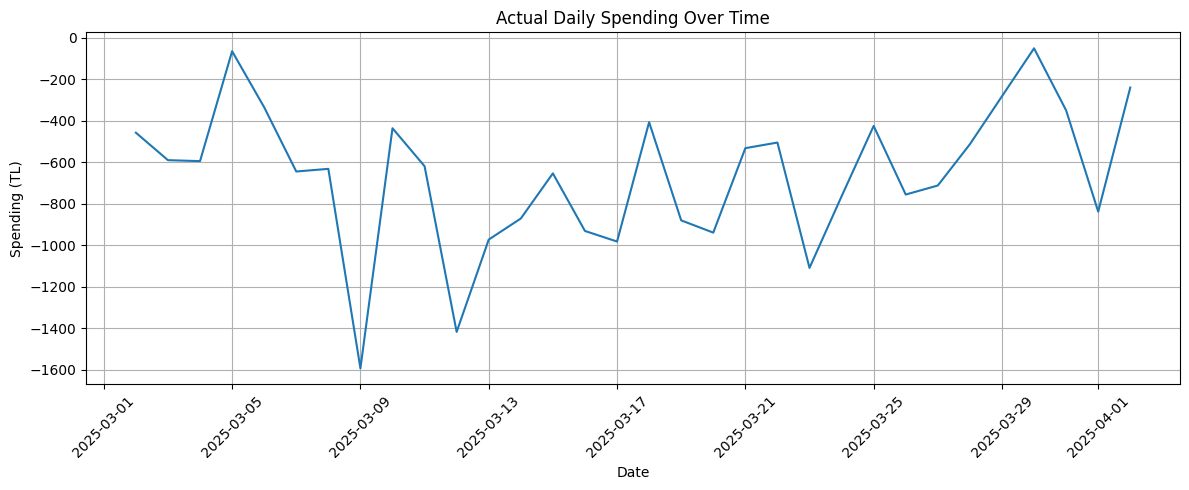

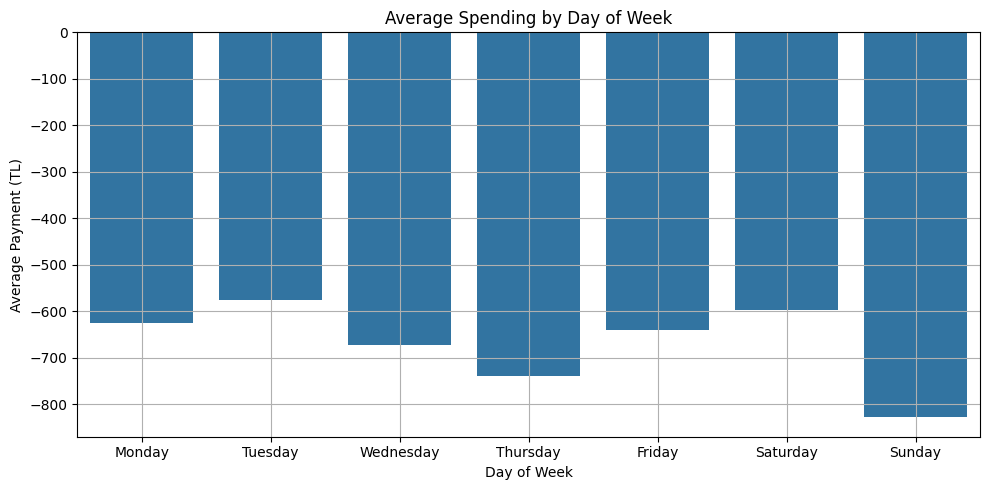

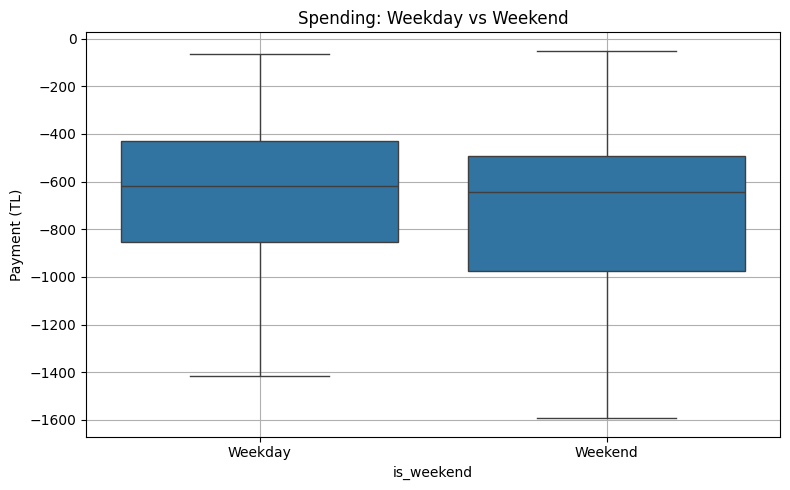

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

transactions_df = pd.read_csv("transactions.csv", sep=';')
weather_df = pd.read_excel("weatherdataset.xlsx")

# Clean transactions data
transactions_df.columns = ['Date', 'Payment', 'Left_Budget', 'Category', 'Campus_Spendings']
transactions_df['Payment'] = transactions_df['Payment'].str.replace(' TL', '', regex=False).str.replace(',', '.').str.strip()
transactions_df['Payment'] = pd.to_numeric(transactions_df['Payment'], errors='coerce')
transactions_df['Date'] = pd.to_datetime(transactions_df['Date'].str[:10], errors='coerce')

# Clean weather data
weather_df['datetime'] = pd.to_datetime(weather_df['datetime'], errors='coerce')
weather_df = weather_df[['datetime', 'temp', 'humidity', 'feelslike', 'windspeed', 'conditions']]
weather_df.rename(columns={'datetime': 'Date'}, inplace=True)

# Merge datasets
merged_df = pd.merge(transactions_df, weather_df, on='Date', how='inner')

# Feature engineering
merged_df['day_of_week'] = merged_df['Date'].dt.day_name()
merged_df['is_weekend'] = merged_df['Date'].dt.weekday >= 5

# Aggregate daily spending
daily_spending = merged_df.groupby(['Date', 'day_of_week', 'is_weekend'])['Payment'].sum().reset_index()

# 1. 📈 Time Series Plot of Daily Spending
plt.figure(figsize=(12, 5))
sns.lineplot(data=daily_spending.sort_values('Date'), x='Date', y='Payment')
plt.title('Actual Daily Spending Over Time')
plt.xlabel('Date')
plt.ylabel('Spending (TL)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# 2. 📊 Average Spending by Day of Week
avg_by_day = daily_spending.groupby('day_of_week')['Payment'].mean().reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
])
plt.figure(figsize=(10, 5))
sns.barplot(x=avg_by_day.index, y=avg_by_day.values)
plt.title('Average Spending by Day of Week')
plt.ylabel('Average Payment (TL)')
plt.xlabel('Day of Week')
plt.grid(True)
plt.tight_layout()
plt.show()

# 3. 📦 Boxplot: Weekday vs Weekend Spending
plt.figure(figsize=(8, 5))
sns.boxplot(data=daily_spending, x='is_weekend', y='Payment')
plt.title('Spending: Weekday vs Weekend')
plt.xticks([0, 1], ['Weekday', 'Weekend'])
plt.ylabel('Payment (TL)')
plt.tight_layout()
plt.grid(True)
plt.show()
